### Introduction
Clustering is a process of grouping similar items together. Each group, also called as a cluster, contains items that are similar to each other. Clustering algorithms are unsupervised learning algorithms i.e. we do not need to have labelled datasets. There are many clustering algorithms for clustering including KMeans, DBSCAN, Spectral clustering, hierarchical clustering etc and they have their own advantages and disadvantages. The choice of the algorithm mainly depends on whether or not you already know how many clusters to create. Some algorithms such as KMeans need you to specify number of clusters to create whereas DBSCAN does not need you to specify. Another consideration is whether you need the trained model to able to predict cluster for unseen dataset. KMeans can be used to predict the clusters for new dataset whereas DBSCAN cannot be used for new dataset.



In this post we’ll classify news articles into different categories. First download the dataset from [DataSet](http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip) and extract. The dataset consists of 2225 documents and 5 categories: business, entertainment, politics, sport, and tech. For most part, we’ll ignore the labels but we’ll use them while evaluating the trained model since many of the evaluation metrics need the “true” labels.

<img src='https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs00521-013-1437-4/MediaObjects/521_2013_1437_Figa_HTML.gif'>



In [1]:
import pandas as pd
import numpy as np
    from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA  # Reduce the dim of data 4-->2
import matplotlib.pyplot as plt

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_mini_batch_kmeans_001.png'>

In [3]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 10 

DATA_DIR = "./Data/bbc/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)

In [5]:
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.head()

,text,label
0,UK 'needs true immigration data'\n\nA former H...,2
1,DVD copy protection strengthened\n\nDVDs will ...,4
2,Tigers wary of Farrell 'gamble'\n\nLeicester s...,3
3,IMF 'cuts' German growth estimate\n\nThe Inter...,0
4,Sprinter Walker quits athletics\n\nFormer Euro...,3


In [6]:
df.tail()

,text,label
2220,China 'blocks Google news site'\n\nChina has b...,4
2221,Hague 'given up' his PM ambition\n\nFormer Con...,2
2222,Bekele sets sights on world mark\n\nOlympic 10...,3
2223,Versace art portfolio up for sale\n\nThe art c...,1
2224,Economy focus for election battle\n\nBritain's...,2


### Feature extraction

For each article in our dataset, we’ll compute TF-IDF values. If you are not familiar with TF-IDF or feature extraction, you can read about them in the second part of this tutorial series called “Text Feature Extraction”

In [7]:
vec = TfidfVectorizer(stop_words="english")
vec

TfidfVectorizer(stop_words='english')

In [8]:
vec.fit(df.text.values)

TfidfVectorizer(stop_words='english')

In [9]:
features = vec.transform(df.text.values)
features

<2225x29126 sparse matrix of type '<class 'numpy.float64'>'
	with 322146 stored elements in Compressed Sparse Row format>

In [20]:
ar = features.toarray()

In [21]:
ar[0]

array([0., 0., 0., ..., 0., 0., 0.])

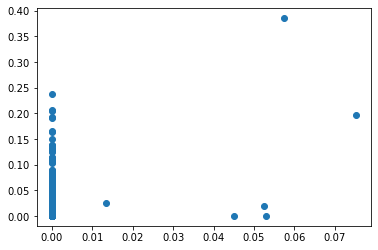

In [23]:
plt.scatter(ar[:,0],ar[:,1])

Now we have our feature matrix, we can feed to the model for training.

### Model training

Let’s create an instance of KMeans. I’ll choose 5 as the number of clusters since the dataset contains articles that belong to one of 5 categories. Obviously, if you do not have labels then you won’t exactly know how many clusters to create so you have to find the best one that fits your needs via running multiple experiements and using domain knowledge to guide you.

Creating a model is pretty simple.

In [11]:
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(n_clusters=5, random_state=10)

That is all it takes to create and train a clustering model. Now to predict the clusters, we can call predict function of the model. Note that not all clustering algorithms can predit on new datasets. In that case, you can get the cluster labels of the data that you used when calling the fit function using labels_ attribute of the model.

In [12]:
# predict cluster labels for new dataset
cls.predict(features)

array([3, 0, 1, ..., 1, 1, 3])

In [13]:
# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([3, 0, 1, ..., 1, 1, 3])

In [24]:
cls.counts_

array([ 608., 3084., 2095., 1643.,  170.])

In [25]:
cls.reassignment_ratio # reassignment  of cluster center

0.01

In [26]:
cls.compute_labels

True

In [27]:
cls.cluster_centers_

array([[0.00000000e+00, 1.19044582e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.32032862e-04, 5.80172982e-03, 0.00000000e+00, ...,
        2.27987733e-04, 2.73921586e-04, 2.35239657e-04],
       [2.50257777e-05, 1.20034713e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61198732e-04, 1.11444812e-02, 1.54982844e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.24280371e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [28]:
cls.inertia_ # Reassign 

2134.728835029129

In [30]:
cls.max_iter # Randomly assigned Cluster Center

100

In [31]:
cls.precompute_distances

'deprecated'

#### Visualization
To visualize, we’ll plot the features in a 2D space. As we know the dimension of features that we obtained from TfIdfVectorizer is quite large ( > 10,000), we need to reduce the dimension before we can plot. For this, we’ll ues PCA to transform our high dimensional features into 2 dimensions.

In [32]:
features.shape

(2225, 29126)

In [36]:
# reduce the features to 2D
pca = PCA(n_components=8, random_state=random_state)
reduced_features = pca.fit_transform(ar)
reduced_features.shape

(2225, 8)

In [37]:
reduced_features

array([[ 0.05419586,  0.01481119,  0.00421808, ..., -0.04922429,
        -0.00337855,  0.03097869],
       [-0.04102177,  0.08332562,  0.05546505, ..., -0.00807251,
        -0.03657989, -0.00966448],
       [-0.04791713, -0.09236034, -0.0730609 , ...,  0.00856939,
        -0.04928955, -0.0448126 ],
       ...,
       [-0.06420134, -0.07123755, -0.02970692, ..., -0.06627851,
         0.18567262,  0.16335047],
       [-0.03703433, -0.00184767,  0.01455321, ...,  0.02333409,
         0.00451412, -0.01461479],
       [ 0.34725231, -0.03560702,  0.01128054, ...,  0.00305722,
        -0.00304064,  0.03333139]])

In [38]:
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
reduced_cluster_centers

array([[-0.04119448,  0.1297599 ,  0.02457962,  0.14108317, -0.04593897,
         0.02425791, -0.00491596,  0.01472555],
       [-0.06430433, -0.07302992,  0.01219455, -0.00125202, -0.00774665,
         0.00109291,  0.00829884, -0.00033639],
       [-0.00767573,  0.07821557, -0.03051319, -0.05301223,  0.0086494 ,
         0.00329335, -0.01023205, -0.00818321],
       [ 0.15032449, -0.01943342,  0.00921659,  0.02097321,  0.01421092,
        -0.01116116, -0.00226025,  0.00484832],
       [ 0.03612193,  0.03948132, -0.01421202, -0.02319781,  0.04836837,
        -0.05602458, -0.01235847,  0.01040675]])

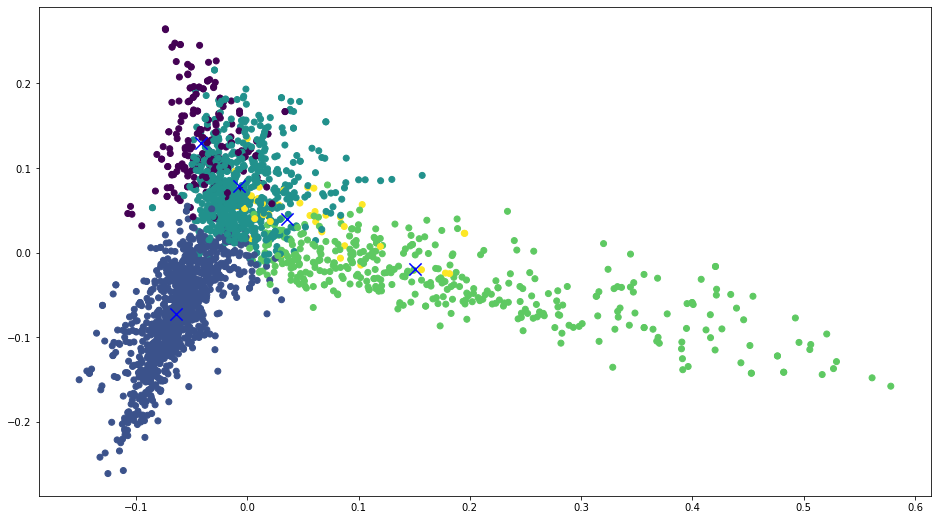

In [39]:
plt.figure(figsize=(16,9))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

This score is useful to check whether the clustering algorithm meets an important requirement: a cluster should contain only samples belonging to a single class. It's defined as:

![](https://www.oreilly.com/library/view/mastering-machine-learning/9781788621113/assets/49f56b63-c9d7-42c9-b57c-8cad30aa8b3c.png)


It's bounded between 0 and 1, with low values indicating a low homogeneity. In fact, when the knowledge of Ypred reduces the uncertainty of Ytrue, H(Ytrue|Ypred) becomes smaller (h → 1) and viceversa. For our example, the homogeneity score can be computed as:

In [40]:
from sklearn.metrics import homogeneity_score  # Smiliraty in Data
homogeneity_score(df.label, cls.predict(features))  # Scale

0.5636705984339283

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

![](https://storage.googleapis.com/platform-blog-prod/silhouette/silhouette_formula.svg)

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))  # to Find How Much Data Overlaping

0.007817640453313304